In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!gdown 1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR

Downloading...
From: https://drive.google.com/uc?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
To: /workspaces/Weekend_Scratching/cars24-car-price-cleaned.csv
100%|██████████████████████████████████████| 1.69M/1.69M [00:00<00:00, 4.32MB/s]


In [4]:
df= pd.read_csv(r"cars24-car-price-cleaned.csv")
df.head(3)

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.7,796.0,46.3,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.9,1197.0,82.0,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.0,1197.0,80.0,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0


In [10]:
df.shape, df['model'].nunique(), df['make'].nunique()

((19820, 18), 3233, 41)

### Target encoding the make and model features

In [12]:
df['make'] = df.groupby('make')['selling_price'].transform('mean')
df['model']= df.groupby('model')['selling_price'].transform('mean')
df.shape

(19820, 18)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()
df= pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

df.head(5)

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.043684,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.194048,0.041550,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.252397,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.232517,0.218382,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.089795,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,0.232517,0.149143,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.095134,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,0.194048,0.093193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.262104,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.252367,0.313574,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
y = df['selling_price']
x= df.drop(columns= ['selling_price'], axis = 1)
y.shape, x.shape

((19820,), (19820, 17))

##### therefore, we got to predict
###### 1. one output feature
###### 2. using 17 input feature

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 14)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((13874, 17), (5946, 17), (13874,), (5946,))

#### linear regression but univariate
#### using 1 feature to train linear regression model

In [20]:
from sklearn.linear_model import LinearRegression

[0.99862062] 0.0012657002913222248


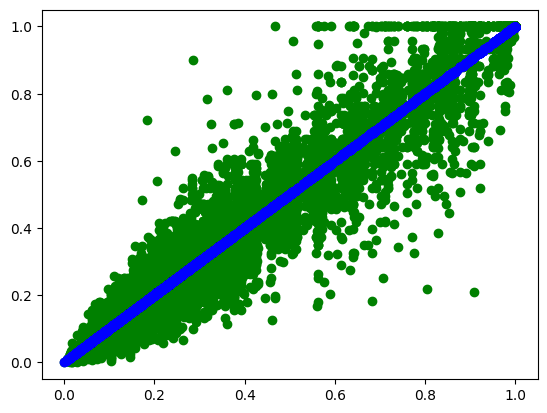

In [24]:
x1_train = x_train[['model']]
x1_test = x_test[['model']]
x1 = x[['model']]
model = LinearRegression()

model.fit(x1_train, y_train)
y1_pred= model.predict(x1)
print(model.coef_ , model.intercept_)

plt.scatter(x1, y, color= 'green')
plt.scatter(x1, y1_pred, color= 'blue')
plt.show()

#### Multivariate